In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.text_cell_render.rendered_html{font-size:16pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:16pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
table.dataframe{font-size:16px;}
</style>
"""))

In [6]:
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩(추천)
import pandas as pd # 원핫인코딩
from tensorflow.keras.models import Sequential, load_model # 모델 생성, 모델 lord
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 딥러닝 : 데이터의 규칙성을 추출
- 응용분야 : 글씨인식, 문장분류, 예측, 질병진단, 얼굴인식
- ML/DL의 종류
    * 지도학습(독립=입력변수, 타겟=종속변수)
        * 분류분석(타겟변수가 category 변수인 분석. 다중분류 vs 이진분류)
    * 비지도학습
        * 군집화
    * 강화학습
- 지도학습
- 1. 데이터 확보 및 생성
- 2. 데이터 전처리 : 스케일 조정, 훈련데이터(학습데이터셋), 검증데이터셋, 시험데이터셋
- 3. 모델구성
- 4. 모델 학습 과정 설정
- 5. 모델 학습(훈련, 검증데이터셋)
- 6. 모델 평가(시험데이터셋)
- 7. 모델 저장/사용(입력값을 주어지면 예측값을 받기)

# 1. 데이터 셋 생성
# 2. 데이터 전처리

In [24]:
# 학습데이터 = 훈련데이터셋
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18]*10)
# 검증데이터, 시험데이터셋
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18])

In [25]:
# 인코딩 종류 (라벨인코딩, 원핫인코딩)
data = np.array(['a','b','c','d','b'])
print('원 데이터 :', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('라벨인코딩된 데이터 :', labeling_data)
one_hot_encoding_data = to_categorical(labeling_data)
print('원핫인코딩된 데이터 :\n', one_hot_encoding_data)

원 데이터 : ['a' 'b' 'c' 'd' 'b']
라벨인코딩된 데이터 : [0 1 2 3 1]
원핫인코딩된 데이터 :
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [26]:
# 원핫인코딩(분류분석을 위한 target변수)
data = np.array([1,4,5,4,5])
categorical_onehot = to_categorical(data) # 원핫인코딩 결과가 numpy 배역
print('to_categorical 이용 \n', categorical_onehot)
getdumimies_onehot = pd.get_dummies(data) # 원핫인코딩 결과가 Dataframe
print('get_demmies 이용\n', getdumimies_onehot)

to_categorical 이용 
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
get_demmies 이용
    1  4  5
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  0  0  1


In [27]:
# 분류분석을 위한 target변수 원핫인코딩
Y_train = to_categorical(y_train, 19)
Y_val = to_categorical(y_val)

# 3. 모델구성

In [28]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(38, activation='sigmoid')) # 황성화 함수 : reLu, eLu, tonh, sigmoid
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(19, activation='softmax'))

# 4. 모델 학습과정 설정
- 회귀분석에서의 loss : mse, rmse, mae
- 다중 분류분석에서의 loss : categorical_crossentropy

In [29]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 5. 모델 학습시키기

In [30]:
hist = model.fit(x_train, Y_train, epochs=300, batch_size=10,
                validation_data=(x_val, Y_val), verbose=2)
# verbose = 0 : 출력없음 1: 기본값출력 2: 에포크별 자세한 로그 출력

Epoch 1/300
9/9 - 1s - loss: 3.1086 - accuracy: 0.0222 - val_loss: 2.8068 - val_accuracy: 0.1111 - 507ms/epoch - 56ms/step
Epoch 2/300
9/9 - 0s - loss: 2.6648 - accuracy: 0.1000 - val_loss: 2.5309 - val_accuracy: 0.1111 - 35ms/epoch - 4ms/step
Epoch 3/300
9/9 - 0s - loss: 2.4710 - accuracy: 0.1111 - val_loss: 2.3696 - val_accuracy: 0.1111 - 30ms/epoch - 3ms/step
Epoch 4/300
9/9 - 0s - loss: 2.3215 - accuracy: 0.1667 - val_loss: 2.2456 - val_accuracy: 0.1111 - 33ms/epoch - 4ms/step
Epoch 5/300
9/9 - 0s - loss: 2.2114 - accuracy: 0.2222 - val_loss: 2.1571 - val_accuracy: 0.2222 - 31ms/epoch - 3ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1315 - accuracy: 0.1556 - val_loss: 2.0828 - val_accuracy: 0.3333 - 30ms/epoch - 3ms/step
Epoch 7/300
9/9 - 0s - loss: 2.0708 - accuracy: 0.3111 - val_loss: 2.0208 - val_accuracy: 0.3333 - 30ms/epoch - 3ms/step
Epoch 8/300
9/9 - 0s - loss: 2.0064 - accuracy: 0.3444 - val_loss: 1.9583 - val_accuracy: 0.3333 - 40ms/epoch - 4ms/step
Epoch 9/300
9/9 - 0s - loss: 1

Epoch 69/300
9/9 - 0s - loss: 0.3943 - accuracy: 1.0000 - val_loss: 0.3816 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 70/300
9/9 - 0s - loss: 0.3967 - accuracy: 1.0000 - val_loss: 0.3651 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 71/300
9/9 - 0s - loss: 0.3691 - accuracy: 1.0000 - val_loss: 0.3540 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 72/300
9/9 - 0s - loss: 0.3624 - accuracy: 1.0000 - val_loss: 0.3421 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 73/300
9/9 - 0s - loss: 0.3530 - accuracy: 1.0000 - val_loss: 0.3360 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 74/300
9/9 - 0s - loss: 0.3341 - accuracy: 1.0000 - val_loss: 0.3222 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 75/300
9/9 - 0s - loss: 0.3306 - accuracy: 1.0000 - val_loss: 0.3112 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 76/300
9/9 - 0s - loss: 0.3313 - accuracy: 1.0000 - val_loss: 0.3159 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.0382 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0379 - accuracy: 1.0000 - val_loss: 0.0370 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.0360 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0363 - accuracy: 1.0000 - val_loss: 0.0351 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.0342 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0340 - accuracy: 1.0000 - val_loss: 0.0333 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0334 - accuracy: 1.0000 - val_loss: 0.0324 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0326 - accuracy: 1.0000 - val_loss: 0.0315 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000 - 35ms/epoch - 4ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 278/300
9/

# 6. 모델 평가하기(모델 학습과정 살펴보고 evaluate)

In [32]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

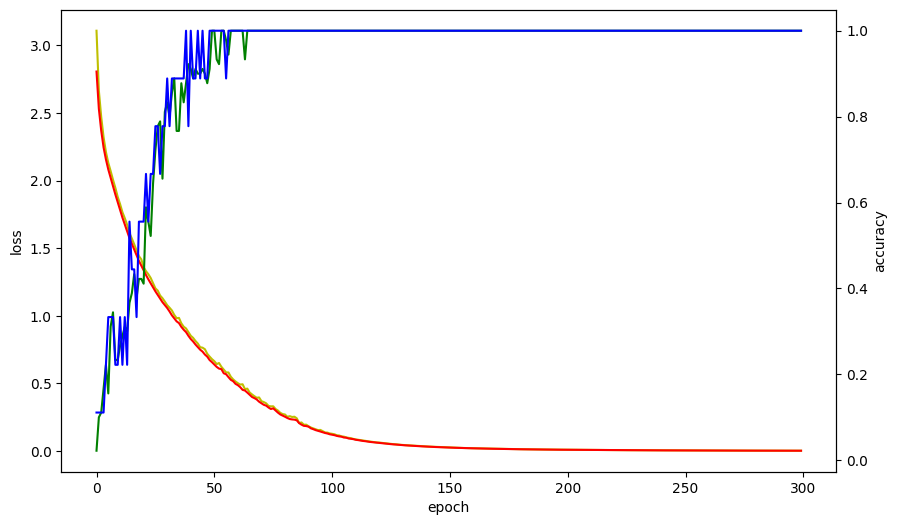

In [39]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
plt.show()

In [41]:
# 모델 평가하기(테스트 데이터셋으로 모델 학습 설정과정의 loss, metrics)
score = model.evaluate(x_val, Y_val, batch_size=3)
print('loss :', score[0])
print('')

3/3 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000


# 7. 모델 사용하기(모델을 이용해서 예측하기)

In [50]:
H = model.predict(np.array([2]))
H.argmax()

1/1 [==============================] - 0s 15ms/step


4

In [46]:
model.predict(np.array([2])).argmax()

1/1 [==============================] - 0s 18ms/step


4

In [51]:
# 몇%의 확률로 4라고 예측했니?
H[0, H.argmax()]*100

99.83484745025635

In [52]:
# 2, 4, 6 의 확률
H[0, [2,4,6]]*100

array([8.264851e-02, 9.983485e+01, 8.250045e-02], dtype=float32)

# 7. 모델 저장

In [53]:
model.save('model/02_deep.h5')